**1-**

In [5]:
from mainlocal import IsingModel
import matplotlib.pyplot as plt
import numpy as np
from multiprocessing import Pool, cpu_count
import time

def plotGraph(xs: np.ndarray, ys: np.ndarray, title: str = "e = E / L^2", xlabel: str = "N", ylabel: str = "e"):
    plt.figure(figsize=(8, 5))
    plt.plot(xs, ys, marker='o', markersize=4, linewidth=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def plotGraphDouble(xs: np.ndarray, ys: np.ndarray, zs: np.ndarray,
                    title1: str = "e = E / L^2", title2: str = "m = M / L^2",
                    xlabel: str = "N", ylabel1: str = "e", ylabel2: str = "m"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    axes[0].plot(xs, ys, marker='o', markersize=4, linewidth=1)
    axes[0].set_title(title1)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel1)
    axes[0].grid(True)
    
    axes[1].plot(xs, zs, marker='o', markersize=4, linewidth=1, color='orange')
    axes[1].set_title(title2)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel2)
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Registamos o que já corremos

ran_simulations = {}

def runSim(L: int, T: int, N_Max: int, showPlot:bool = True, tTerm:int = 0) -> tuple[np.array, np.array, np.array]:
    """
    Objetivos:
    - Correr a simulacao com L e T
    - Apresentar o gráfico de e = E / L^2 em função da iteração N
    """

    ising = IsingModel(L, T)
    ising.iter_monte_carlo(N_Max + tTerm)
    eMed = ising.calc_ener()
    mMed = ising.calc_mag()


    eMed = eMed[tTerm:len(eMed) + 1]
    mMed = mMed[tTerm:len(mMed) + 1]

    # Stores simulations

    if not ran_simulations.get(L):
        ran_simulations[L] = [{"T": T, "eM": eMed, "mMed": mMed}]
    else: ran_simulations[L].append({"T": T, "eM": eMed, "mMed": mMed})

    if showPlot: plotGraphDouble(np.arange(0, N_Max), eMed, mMed)

    return eMed, mMed 
    
N_Max = 200000

for L in [16, 32, 64, 128]:
    for T in [1, 2, 3, 4]:
        runSim(L, T, N_Max, False)


L=   128, T=4.000000: 100%|██████████| 200000/200000 [00:00<00:00, 322340.11it/s]


**b)**

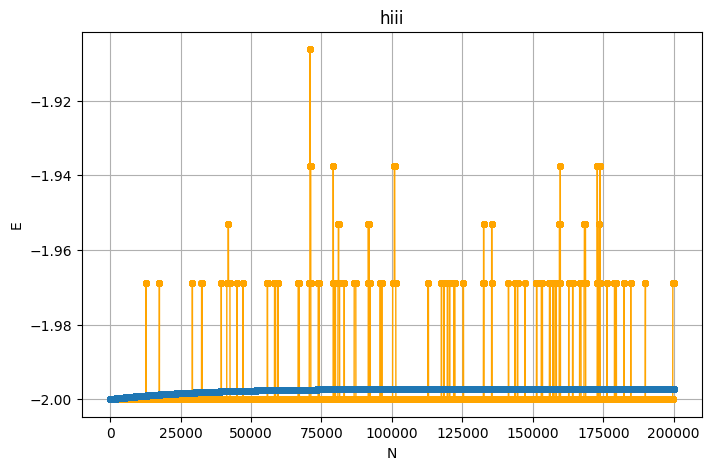

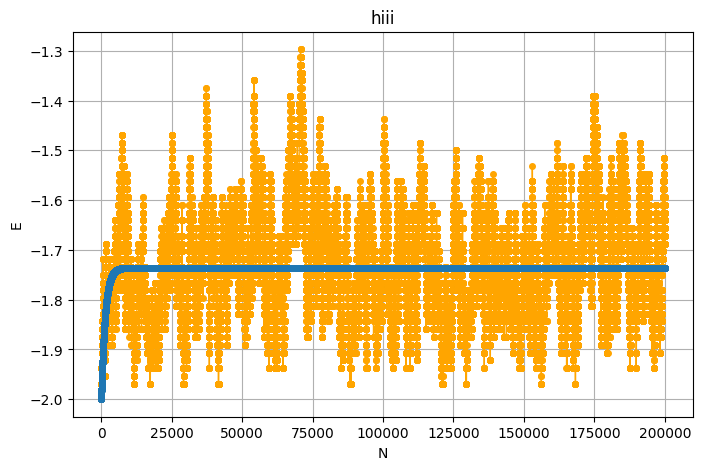

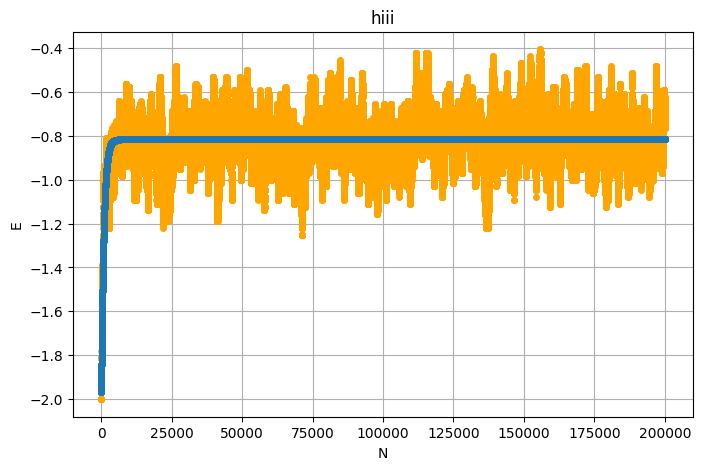

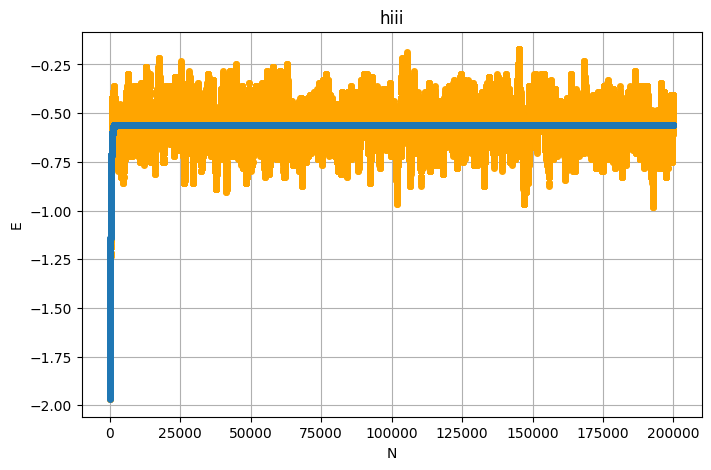

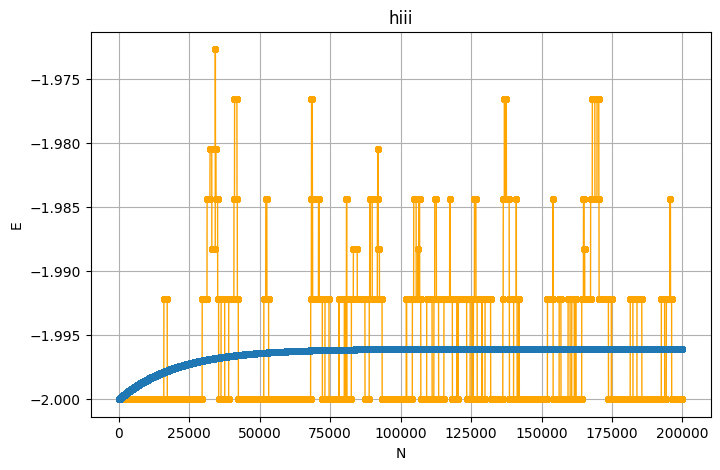

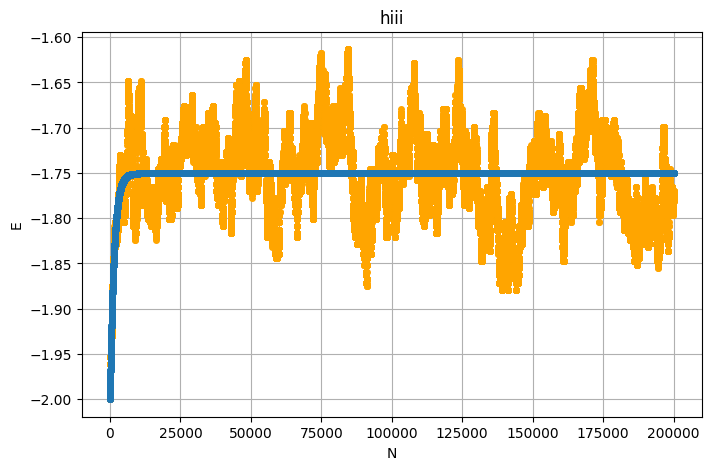

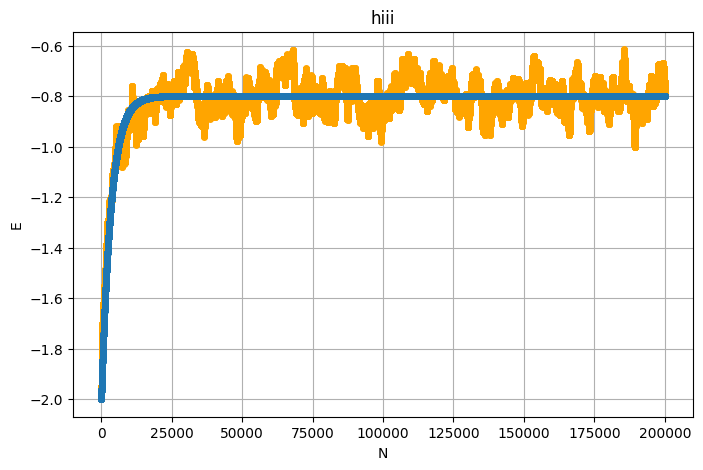

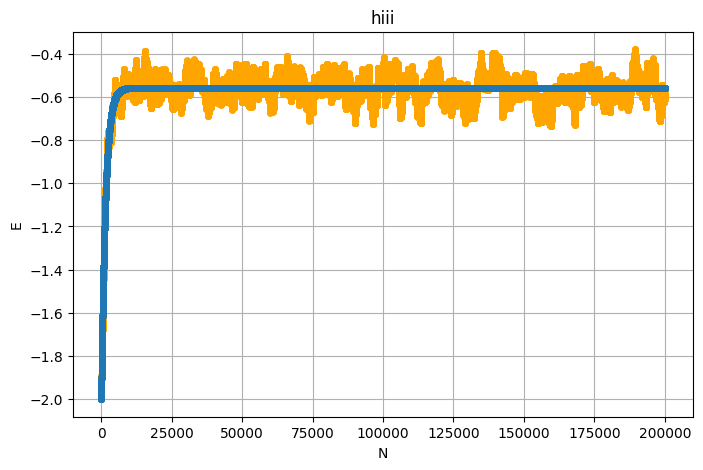

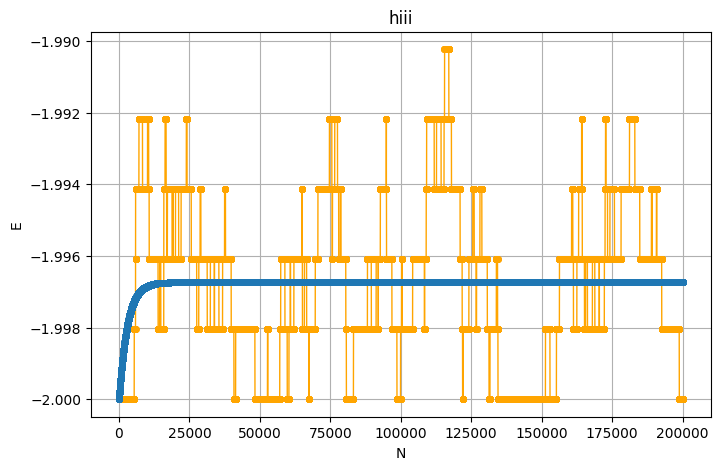

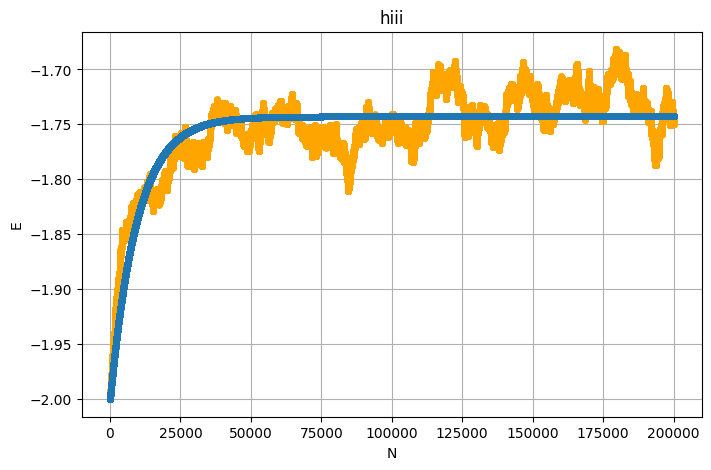

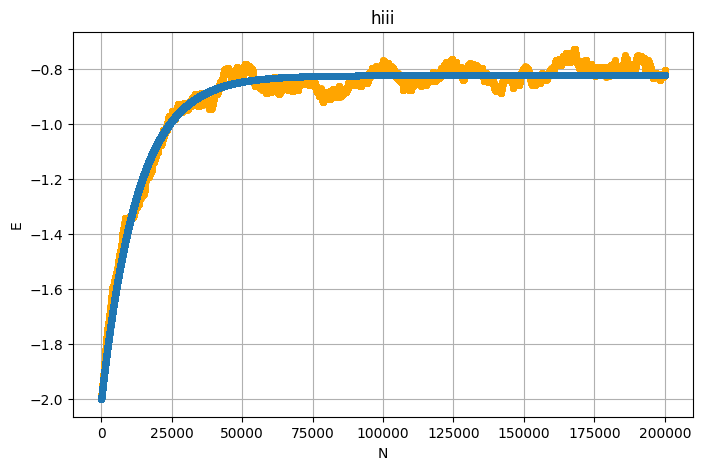

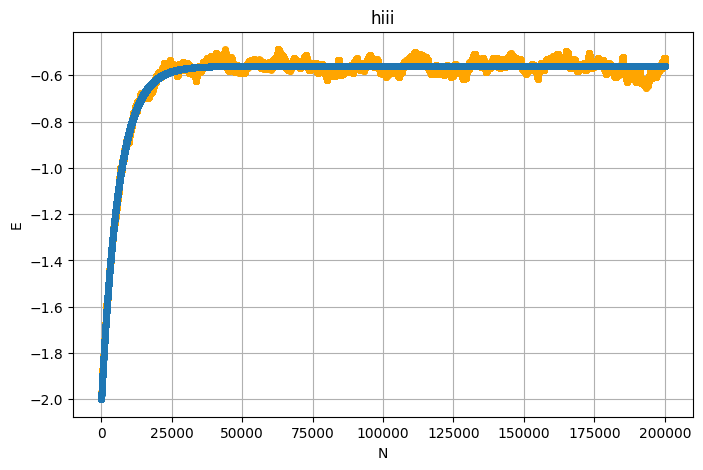

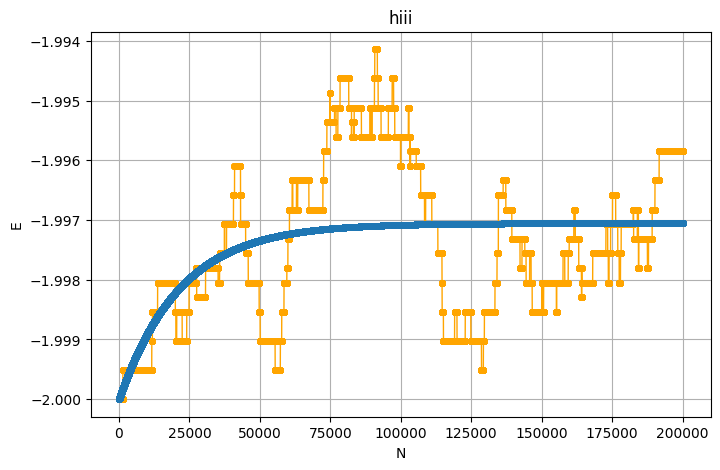

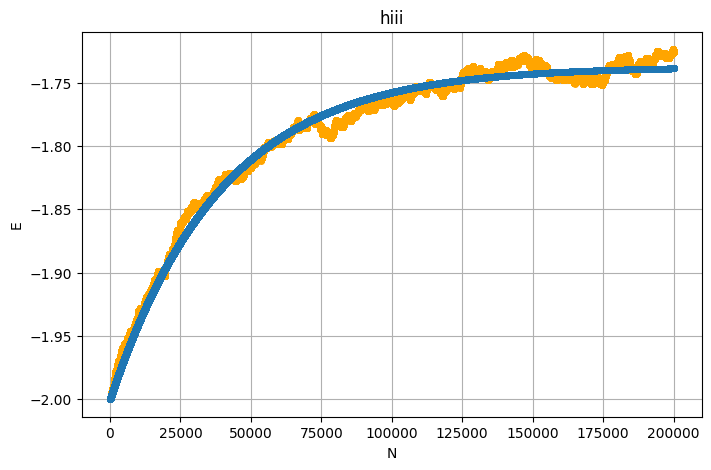

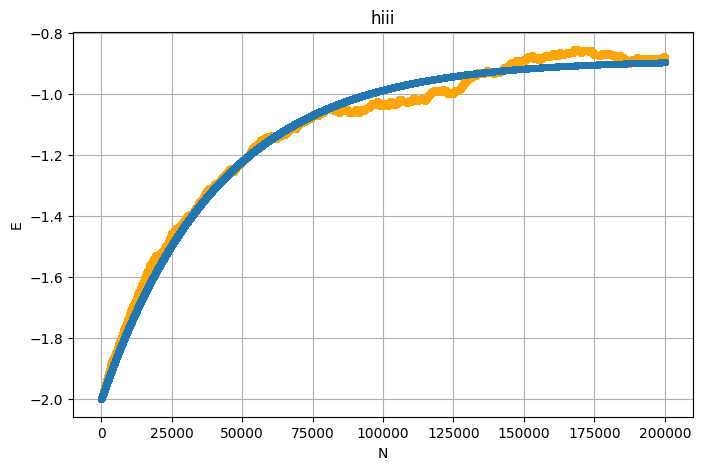

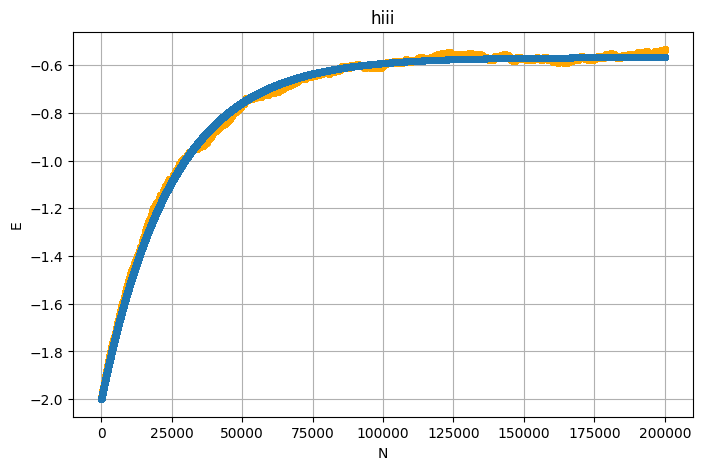

{16: ([1, 2, 3, 4], [np.float64(30434.869827356088), np.float64(1372.9589576702376), np.float64(888.0741312282157), np.float64(266.74027127113914)], [np.float64(-1.9971407707236184), np.float64(-1.7357182055733769), np.float64(-0.8163553572114636), np.float64(-0.5602452013885179)]), 32: ([1, 2, 3, 4], [np.float64(20636.21044844197), np.float64(1397.415709683522), np.float64(3377.5969650931083), np.float64(1463.793218736388)], [np.float64(-1.9960470392180167), np.float64(-1.7503728673644818), np.float64(-0.7982651203410468), np.float64(-0.5576820206672721)]), 64: ([1, 2, 3, 4], [np.float64(2959.837418636328), np.float64(9543.619670440557), np.float64(12772.391574820675), np.float64(6087.050284247071)], [np.float64(-1.9967347759240102), np.float64(-1.742734494373436), np.float64(-0.8230194238577524), np.float64(-0.5594138378957569)]), 128: ([1, 2, 3, 4], [np.float64(21523.156335093598), np.float64(39163.292847553144), np.float64(41373.348587496825), np.float64(24794.315680176962)], [np.f

In [6]:
from scipy.optimize import curve_fit

def energy_aproximation(L):
    
    # Initializes finalEnergies, taus and Temperatures per L

    eFs = []
    taus = []
    Ts = []

    for val in ran_simulations[L]:
        T = val["T"]    
        eM = val["eM"]

        # Defines the equation e(N) ≡ e_f + (e_0 - e_f)e^(-N/τ)

        def energyAproximationFunction(x, tTerm, eF):
            return eF + (eM[0] - eF)*np.exp(-x/tTerm)
        
        xs = np.arange(0, len(eM))

        # Makes the fit!

        popt, pcov = curve_fit(energyAproximationFunction, xs, eM)
    
        # Makes a pretty plot!
                
        plt.figure(figsize=(8, 5))
        plt.plot(xs, eM, marker='o', markersize=4, linewidth=1, color='orange')
        plt.plot(xs, energyAproximationFunction(xs, *popt), marker='o', markersize=4, linewidth=1)
        plt.title("hiii")
        plt.xlabel("N")
        plt.ylabel("E")
        plt.grid(True)
        plt.show()

        # Appends stuff into their respective places

        Ts.append(T)
        (lambda x,y: [eFs.append(y), taus.append(x)])(*popt)
    return (Ts, taus, eFs)

fits = {}

# Goes over all Ls

for L in ran_simulations:
    approximations = energy_aproximation(L)
    fits[L] = approximations

print(fits)
        





**c)**

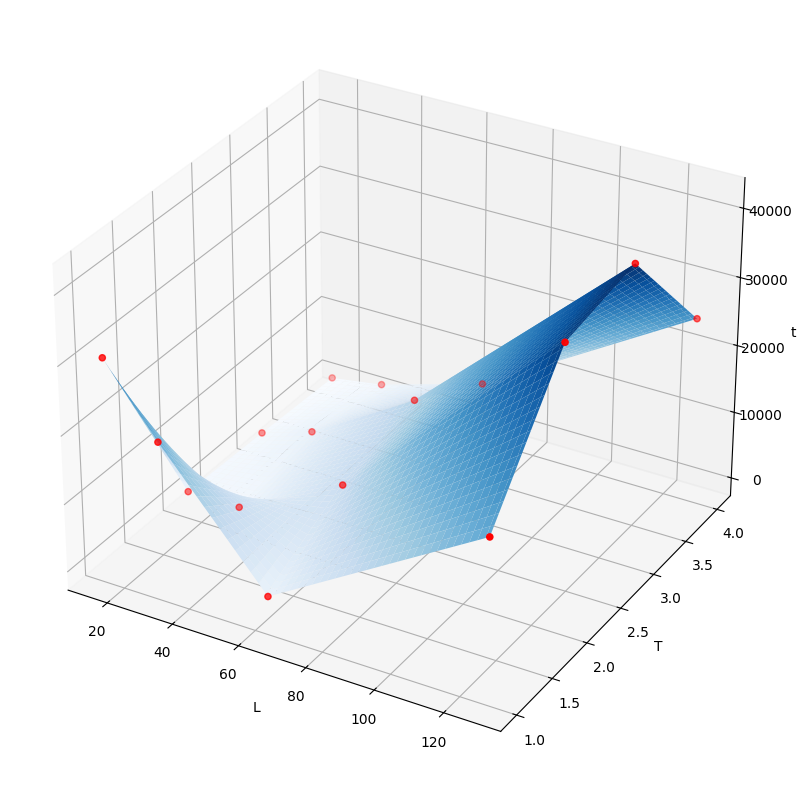

In [7]:
from scipy.interpolate import RegularGridInterpolator


L_axis = np.array(list(fits.keys())) #Retrieves the Lenghts used
T_axis = [value[0] for value in fits.values()] #Retrieves the Temperaturesfor each L
T_axis = np.array(T_axis[0]) #Takes one of 4 repeated arrays (lists), since the 4 temperatures for each L are the same
tau_axis = np.array([value[1] for value in fits.values()])

#Preparar a grid de pontos a interpolar:


#Cria-se uma grid de valores entre min(x) max(x) e min(y) max(y) com grid_step pontos em cada eixo
x_points = np.linspace(min(L_axis), max(L_axis), 100)
y_points = np.linspace(min(T_axis), max(T_axis), 100)
x_grid, y_grid = np.meshgrid(x_points, y_points)


# O interpolador é criado com RegularGridInterpolator e aceita os data points arrays x e y. Z com valores da função.
interpolator = RegularGridInterpolator((L_axis, T_axis), tau_axis)

points = np.array([x_grid.ravel(), y_grid.ravel()]).T


z_interpolated = interpolator(points).reshape(x_grid.shape)


#Representação gráfica:

fig = plt.figure(figsize=(10,10))
graph = fig.add_subplot(111, projection="3d")
graph.set_xlabel("L")
graph.set_ylabel("T")
graph.set_zlabel("t")
graph.plot_surface(x_grid,y_grid, z_interpolated, cmap='Blues')

X, Y = np.meshgrid(L_axis, T_axis, indexing="ij") # Cria uma grid para os pontos originais

graph.scatter(X.flatten(), Y.flatten(), tau_axis.flatten(), color="red", label="data points") # Dá display nos data-points

# 2

**a)**

L=    16, T=4.000000: 100%|██████████| 1077/1077 [00:00<00:00, 358342.49it/s]


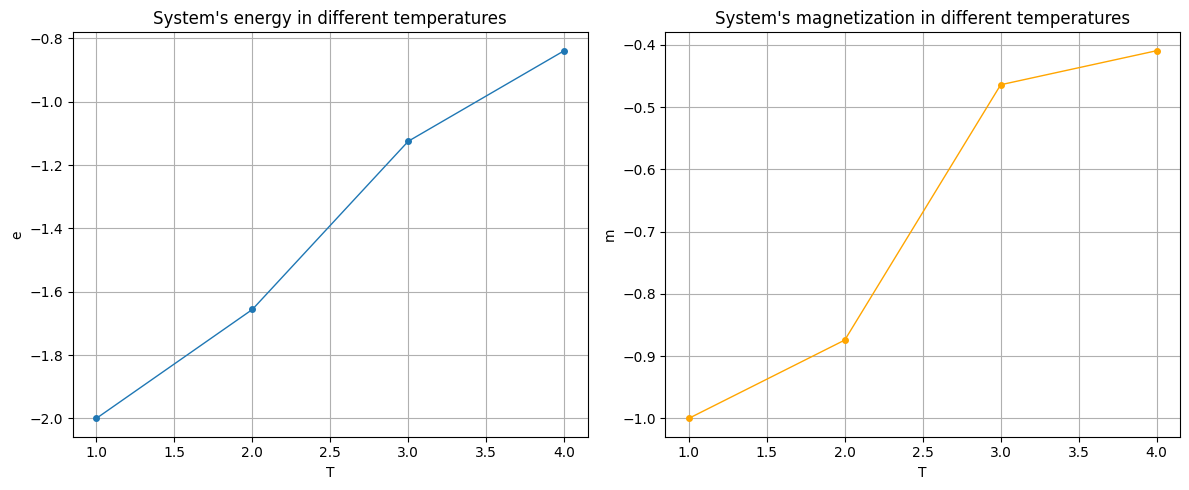

L=    32, T=4.000000: 100%|██████████| 5865/5865 [00:00<00:00, 343272.49it/s]


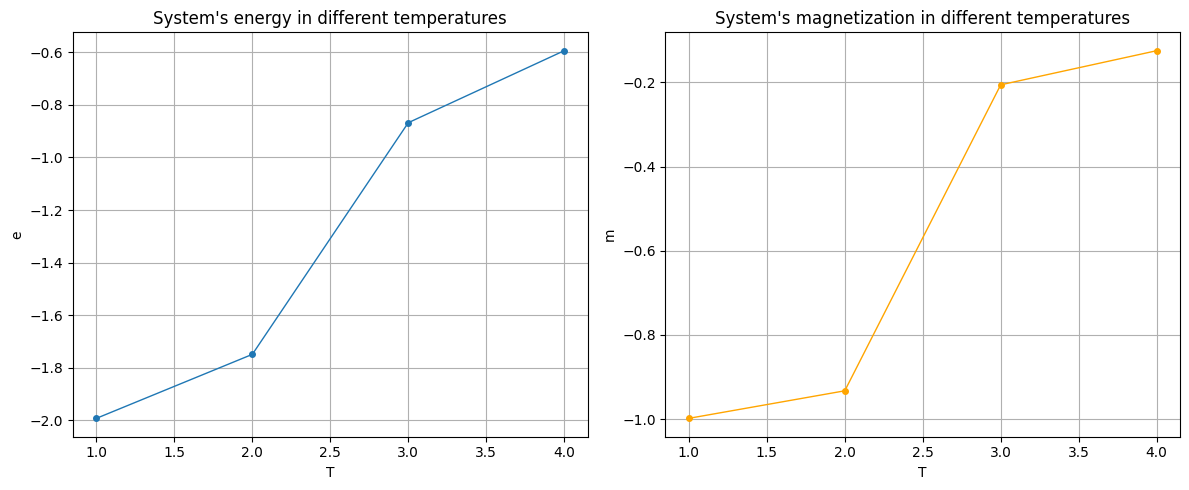

L=    64, T=4.000000: 100%|██████████| 24358/24358 [00:00<00:00, 359046.40it/s]


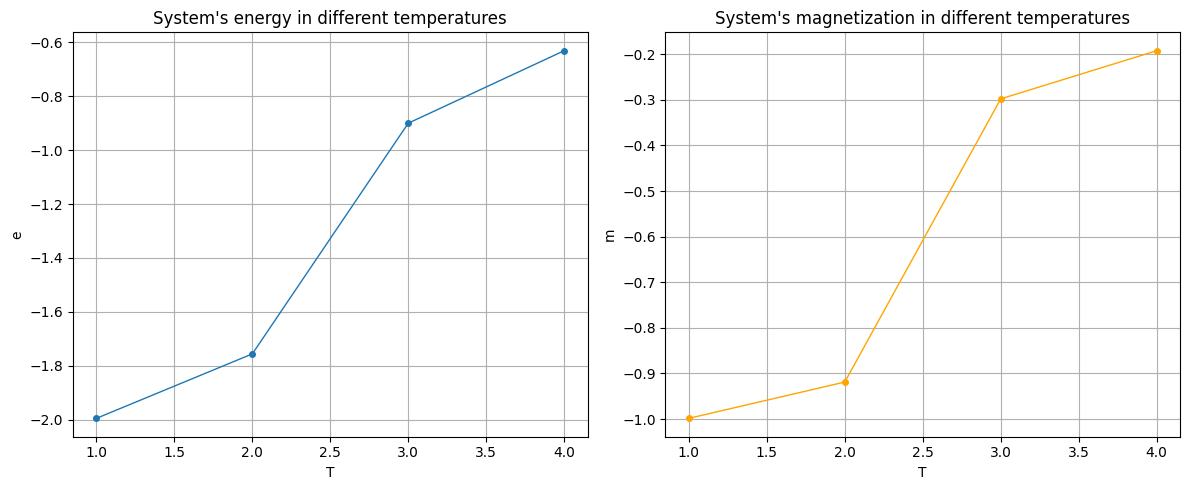

L=   128, T=4.000000: 100%|██████████| 99187/99187 [00:00<00:00, 255438.66it/s]


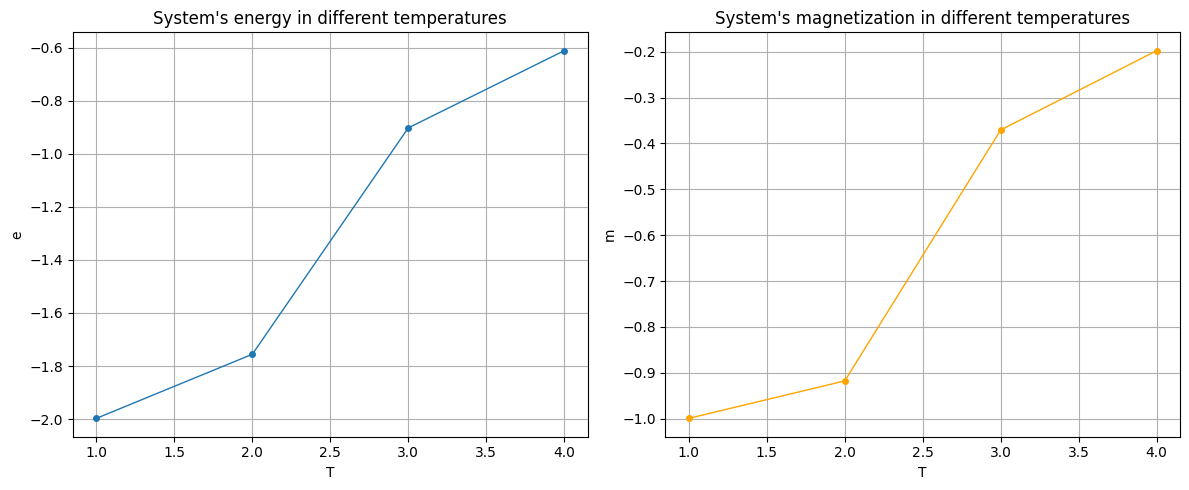

In [106]:
tMin, tMax, deltaT, nMeasurements = 1, 4, 1, 10
temperatures = np.arange(tMin, tMax+deltaT, deltaT)

ran_simulations = {}

for L in [16, 32, 64, 128]:
    energies = []
    energiesDESVPADS = []
    magnetizations = []
    magnetizationsDESVPADS = []
    for T in temperatures:
        nTerm = 4 * interpolator([L, T])[0]
        eMed, mMed = runSim(L, T, nMeasurements, False, round(nTerm))

        eAvg = np.mean(eMed)
        mAvg = np.mean(mMed)
        eAvgSTDDEV = np.std(eMed)
        mAvgSTDDEV = np.std(mMed)
        
        energies.append(eAvg)
        energiesDESVPADS.append(eAvgSTDDEV)
        magnetizations.append(mAvg)
        magnetizationsDESVPADS.append(mAvgSTDDEV)
    plotGraphDouble(temperatures, np.array(energies), np.array(magnetizations), "System's energy in different temperatures", "System's magnetization in different temperatures", "T")
    ran_simulations[L] = np.array([temperatures, energies, energiesDESVPADS, magnetizations, magnetizationsDESVPADS])    
    



**b)**

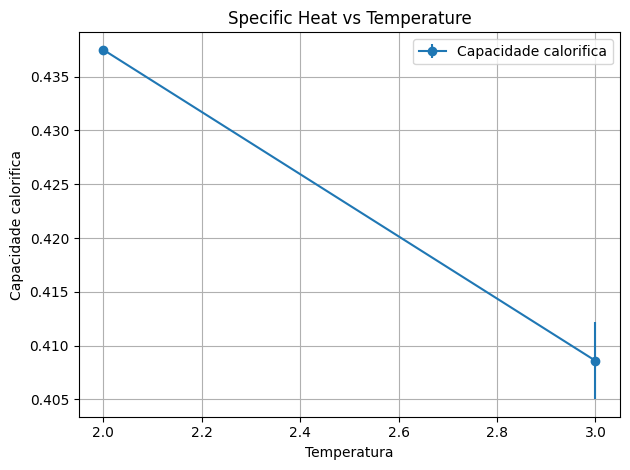

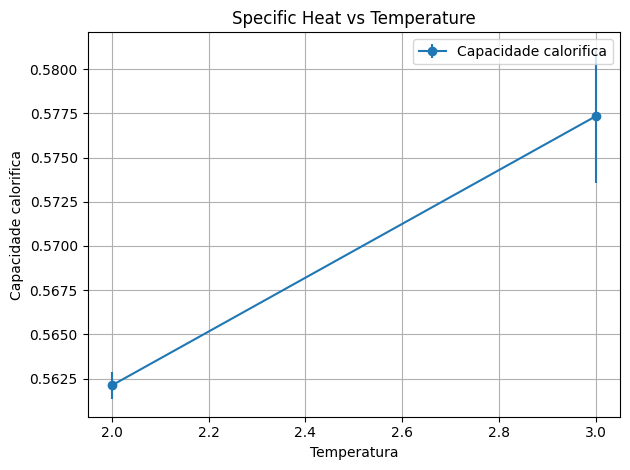

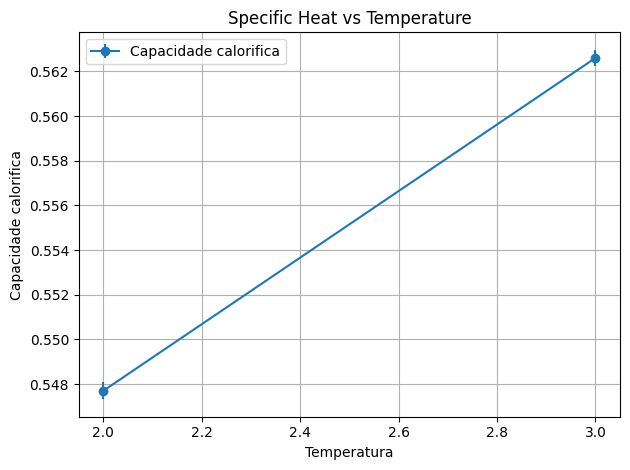

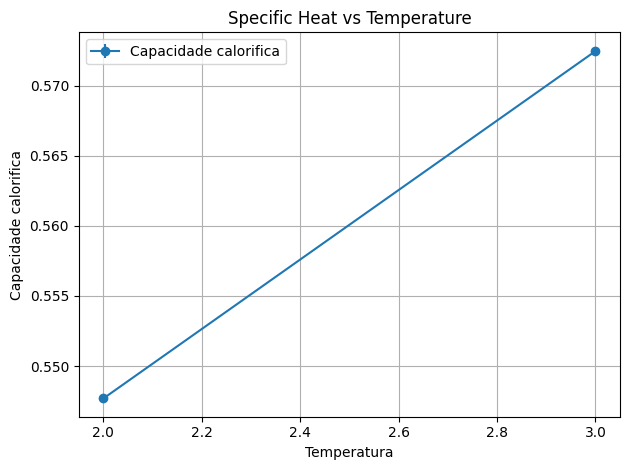

[np.float64(2.0), np.float64(3.0), np.float64(3.0), np.float64(3.0)]


In [107]:
from scipy.interpolate import CubicSpline

def critialTempFinder(T:np.ndarray, E:np.ndarray, sigmaE:np.ndarray)-> float:
    # Calcular o h (h=0.2 mas compatibilidade) e a derivada central
    h:float = T[1] - T[0]
    # Usar a formula de central difference
    c = (E[2:] - E[:-2]) / (2 * h)

    # Erros associadosss
    sigmaC = np.sqrt(sigmaE[2:]**2 + sigmaE[:-2]**2) / (2 * h)
    
    
    tMid = T[1:-1]
    criticaI = np.argmax(c)
    tempCrit:float = tMid[criticaI]
    
    plt.errorbar(tMid, c, yerr=sigmaC, fmt='o-', label='Capacidade calorifica')
    plt.xlabel('Temperatura')
    plt.ylabel('Capacidade calorifica')
    plt.title('Specific Heat vs Temperature')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return tempCrit

criticalTemps = []

for key in ran_simulations:
    values = ran_simulations[key]
    cT = critialTempFinder(*values[:3]) # massive win collon tree :3
    criticalTemps.append(cT)

print(criticalTemps)

    





**3**

**a)**

In [102]:
from typing import Any
from scipy.integrate import trapezoid

L = 128
T_max = 10
T_min = 0.1
T_step = 0.1

last_N = 75000





ran_simulations = {}

def E(T): # This function return the total average energy of the lattice for a given temperature after achieveing thermalization
    if 1 < T < 4:
        nTerm = 4 * interpolator([L, T])[0]
        eMed, mMed= runSim(L, T , 200000 , False, round(nTerm))
        return np.mean(eMed) * L**2
    
    eMed, mMed = runSim(L, T, 200000, False)
    return np.mean(eMed[190000-last_N:]) * L**2

stored_data = {} # Stores the values of E(T) for all steps between the min and max temp, to avoid repeating later on.

for T in np.arange(T_min, T_max + T_step, 0.1):
    stored_data[round(T,2)] = E(T)
    
    

def g(T): # This function returns the values of the function inside the integral needed to calculate the Helmholtz energy
    return stored_data[round(T,2)] / T**2

    
def Temp_integral(T):

    T_values = np.arange(T, T_max, T_step)
    y_values = np.array([g(T) for T in T_values])

    return trapezoid(y_values, T_values)

def Helmholtz(T):

    if T >= 10:
        return -T*L**2*np.log(2)
    
    # print("Temp: ", T,  "Integral: ", Temp_integral(T), "Const: ", - L**2 * np.log(2))
    return T * (-Temp_integral(T) - L**2 * np.log(2)) # This has an "extra" minus sign. The reason is, without it, the function has no roots, and 2b) has no solution, so after proof reading the code many many times, nothing seems wrong, the likely explanation is acounting for sign convention.

for T in np.arange(T_min, T_max, T_step):
    print("T: ", T,"F: ", Helmholtz(T))

temps = np.array([T for T in np.arange(T_min, T_max + T_step, T_step)])
helms = np.array([Helmholtz(T) for T in temps])

L=   128, T=10.000000: 100%|██████████| 200000/200000 [00:00<00:00, 321536.39it/s]


T:  0.1 F:  35256.818648124136
T:  0.2 F:  29553.637296248293
T:  0.30000000000000004 F:  26581.122611039093
T:  0.4 F:  24063.719036941005
T:  0.5 F:  21682.84879617627
T:  0.6 F:  19356.591888744857
T:  0.7000000000000001 F:  17056.416080099632
T:  0.8 F:  14770.30829538397
T:  0.9 F:  12493.065408287355
T:  1.0 F:  10223.091310036065
T:  1.1 F:  7960.948860365881
T:  1.2000000000000002 F:  5707.131763498312
T:  1.3000000000000003 F:  3465.074351321885
T:  1.4000000000000001 F:  1237.6804366137649
T:  1.5000000000000002 F:  -973.7893994988573
T:  1.6 F:  -3160.78538667656
T:  1.7000000000000002 F:  -5318.001157323625
T:  1.8000000000000003 F:  -7448.413132358423
T:  1.9000000000000001 F:  -9545.580615356579
T:  2.0 F:  -11589.483323319932
T:  2.1 F:  -13573.910309778788
T:  2.2 F:  -15496.585033441725
T:  2.3000000000000003 F:  -17345.503363637694
T:  2.4000000000000004 F:  -19117.290388685586
T:  2.5000000000000004 F:  -20817.51063649193
T:  2.6 F:  -22453.40400611776
T:  2.7 F:  -2

-11356.523406294144
dict_keys([np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9), np.float64(1.0), np.float64(1.1), np.float64(1.2), np.float64(1.3), np.float64(1.4), np.float64(1.5), np.float64(1.6), np.float64(1.7), np.float64(1.8), np.float64(1.9), np.float64(2.0), np.float64(2.1), np.float64(2.2), np.float64(2.3), np.float64(2.4), np.float64(2.5), np.float64(2.6), np.float64(2.7), np.float64(2.8), np.float64(2.9), np.float64(3.0), np.float64(3.1), np.float64(3.2), np.float64(3.3), np.float64(3.4), np.float64(3.5), np.float64(3.6), np.float64(3.7), np.float64(3.8), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.3), np.float64(4.4), np.float64(4.5), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9), np.float64(5.0), np.float64(5.1), np.float64(5.2), np.float64(5.3), np.float64(5.4), np.float64(5.5), np.float64(5.6), np.float64(5.7), 

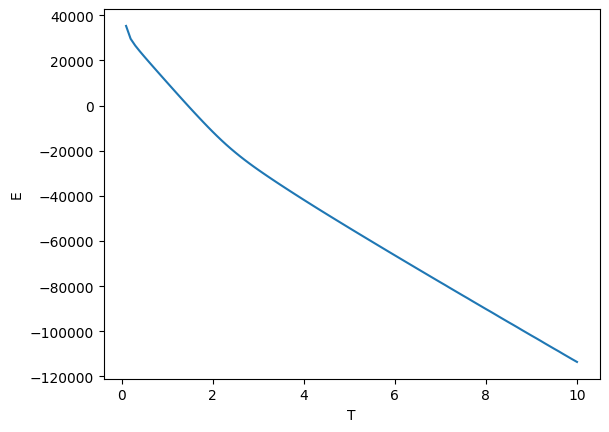

In [103]:
# plt.scatter(temps, helms)



print(-L**2*np.log(2))
T_crit_min = 0.5
T_crit_max = 4.5
T_step = 0.1
T_values_crit = np.arange(T_crit_min, T_crit_max + T_step, T_step)
print(stored_data.keys())
g_values_crit = np.array([g(T) for T in T_values_crit])
e_values = np.array([stored_data[round(T,2)] for T in temps])
plt.xlabel("T")
plt.ylabel("E")
plt.plot(temps, helms)



**b)**

-0.003091419022718478
1.455856791138649


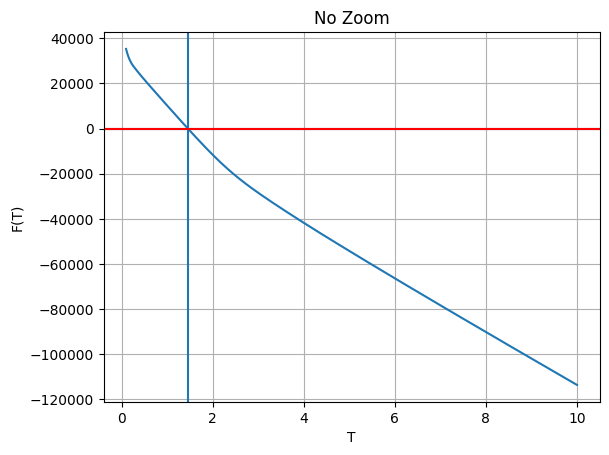

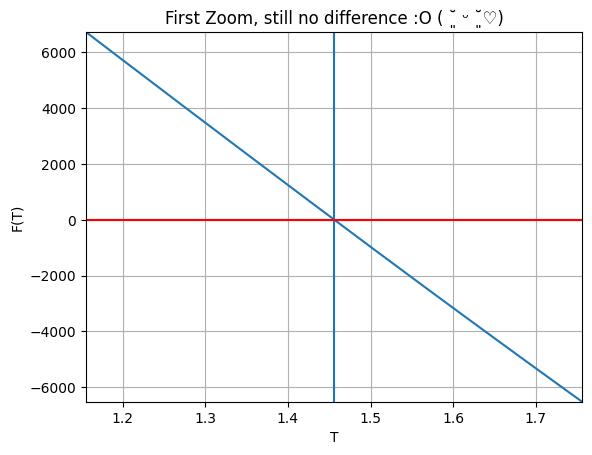

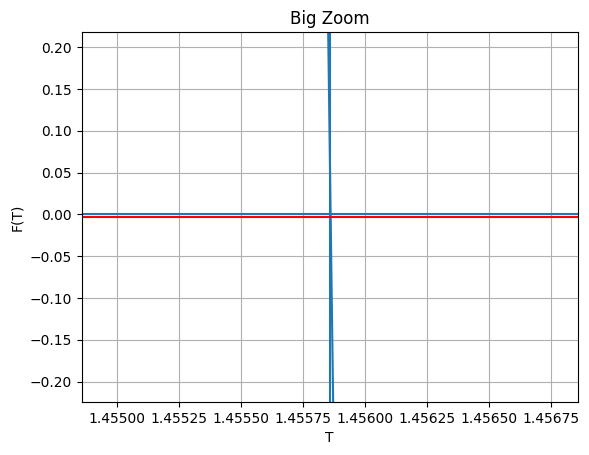

In [115]:
from scipy.interpolate import CubicSpline


temps = np.array([T for T in np.arange(T_min, T_max + T_step, T_step)])
helms = np.array([Helmholtz(T) for T in temps])



variable_points = temps
function_points = helms

helmholtz_interpolator = CubicSpline(variable_points, function_points)


x = np.linspace(min(temps), max(temps), 500)
y = helmholtz_interpolator(x)





def bissetriz(f:callable, interval: np.ndarray[float, float], threshold:float = 10**-6) -> np.ndarray[float, float,]:   # Function returns both the root value, as well the the function at that root, to verify how close it is to actual 0
    
    if len(interval) !=2:
        raise ValueError
    
    
    a = interval[0]
    b = interval[1]

    interval_lenght = abs(a - b)

    while abs(b - a) > threshold:

        
        c = (a + b)/2

        if f(a) * f(c) < 0: #if this is true, the root in inside [a , c], make b = c

            b = c

        else:               #caso contrário - > f(c) * f(b) < 0
            a = c


    return (a + b)/2 , f((a + b)/2)



root, zero = bissetriz(helmholtz_interpolator, np.array([min(temps), max(temps)]))





no_zoom = plt.figure()
plt.plot(x,y)
plt.title("No Zoom")
plt.xlabel("T")
plt.ylabel("F(T)")
plt.grid()

plt.axvline(root) #displays a vertical line at T' such that F(T') ~ 0
plt.axhline(0) # displays a horizontal line at y = 0
plt.axhline(zero, color = "red") # displays a horizontal line at F(T') ~ 0, we can see it both are really really really close



# Let's do this for more zooms to see if we can find the error!

zoom1 = plt.figure()
plt.plot(x,y)
plt.title("First Zoom, still no difference :O ( ˘͈ ᵕ ˘͈♡)")
plt.xlabel("T")
plt.ylabel("F(T)")
plt.grid()

#zooms
plt.xlim(root - 0.3, root + 0.3)
plt.ylim(helmholtz_interpolator(root + 0.3), helmholtz_interpolator(root - 0.3))

plt.axvline(root)
plt.axhline(0) 
plt.axhline(zero, color = "red") 


zoom2 = plt.figure()
plt.plot(x,y)
plt.title("Big Zoom")
plt.xlabel("T")
plt.ylabel("F(T)")
plt.grid()

#zooms
plt.xlim(root - 0.001, root + 0.001)
plt.ylim(helmholtz_interpolator(root + 0.00001), helmholtz_interpolator(root - 0.00001))

plt.axvline(root)
plt.axhline(0) 
plt.axhline(zero, color = "red")

#Even at a really big zoom, the difference is miniscule.

print(helmholtz_interpolator(root))
print(root)



A temperatura para F(T) = 0 é ~ 1.455

**c)**

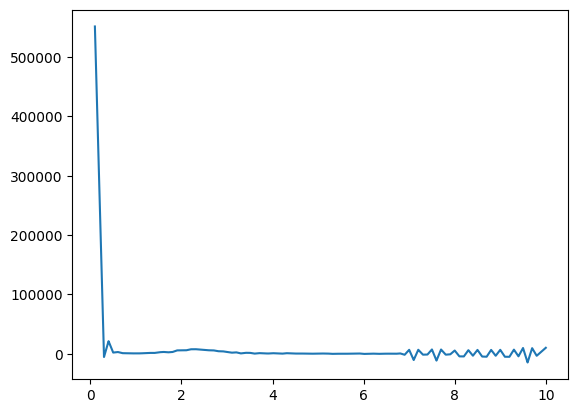

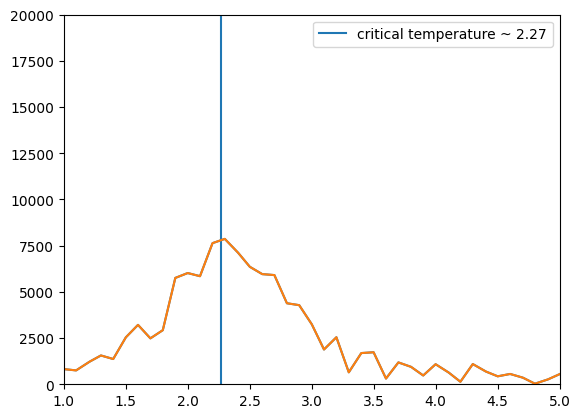

In [114]:

from scipy.differentiate import derivative

dTs = np.linspace(min(temps), max(temps), 10000)

helmholtz_second_derivative = helmholtz_interpolator.derivative(2)
second_derivative_values = helmholtz_second_derivative(dTs)


second_derivative_graph = plt.figure()
plt.plot(dTs, second_derivative_values)

second_derivative_graph_around_Tc = plt.figure()
plt.plot(dTs, second_derivative_values)
plt.xlim(1, 5)
plt.ylim(0, 20000)
plt.axvline(2.27, label = "critical temperature ~ 2.27")
plt.legend()
plt.plot(dTs, second_derivative_values)


A fórmula geral da energia de Helmholtz é 

$$F = U - TS$$


onde F, U, T, e S são respetivamente a energia de Helmholtz, a energia interna, a temperatura, e a entropia.

Na sua forma diferencial, temos


$$ dF = -S dT - P dV $$

ou seja, as variáveis naturais de F são T e V => F = F(T, V).

Através do quadrado termodinâmico, podemos verificar que $$ \left( \frac{\partial F}{ \partial T} \right) _V \    = -S $$

Se diferenciarmos novamente, temos

$$ \left( \frac{\partial S}{ \partial T} \right) _V $$

Para falar na energia na Helholtz, temos que o volume é constante, e então

$$ dU = dQ = TdS \hspace{10mm} (1)$$ 

Por definição

$$ C_V = \left( \frac{\partial U}{ \partial T} \right) _V \ \implies dU = C_V dT \hspace{10mm} (2)$$ 

Substituindo em (1), temos que

$$ \left( \frac{\partial S}{ \partial T} \right) _V  = \left( \frac{\partial^2 F}{ \partial T^2} \right) _V = \frac{C_V}{T} $$

Mostrámos que a segunda derivada da energia livre de Helmholtz é proporcional à capacidade calorífica. O comportamento do gráfico obtido corresponde com dados prévios que indicam um pico na capacidade calorífica à volta da temperature crítica, "rodeado" de uma região aproximadamente constante.